In [1]:
import sys
sys.path.append('../')

from gears import PertData, GEARS

Load data. We use norman as an example.

In [2]:
pert_data = PertData('./data')
pert_data.load(data_name = 'norman')
pert_data.prepare_split(split = 'simulation', seed = 1)
pert_data.get_dataloader(batch_size = 32, test_batch_size = 128)

Found local copy...
Downloading...
100%|██████████| 169M/169M [00:10<00:00, 16.9MiB/s]   
Extracting zip file...
Done!
Found local copy...
These perturbations are not in the GO graph and their perturbation can thus not be predicted
['RHOXF2BB+ctrl' 'LYL1+IER5L' 'ctrl+IER5L' 'KIAA1804+ctrl' 'IER5L+ctrl'
 'RHOXF2BB+ZBTB25' 'RHOXF2BB+SET']
Creating pyg object for each cell in the data...
Creating dataset file...
100%|██████████| 277/277 [02:58<00:00,  1.55it/s]
Done!
Saving new dataset pyg object at ./data/norman/data_pyg/cell_graphs.pkl
Done!
Creating new splits....
Saving new splits at ./data/norman/splits/norman_simulation_1_0.75.pkl
Simulation split test composition:
combo_seen0:9
combo_seen1:43
combo_seen2:19
unseen_single:36
Done!
Creating dataloaders....
Done!


In [3]:
import torch
torch.cuda.is_available()

True

Create a model object; if you use [wandb](https://wandb.ai), you can easily track model training and evaluation by setting `weight_bias_track` to true, and specify the `proj_name` and `exp_name` that you like.

In [4]:
gears_model = GEARS(pert_data, device = 'cuda', 
                        weight_bias_track = False, 
                        proj_name = 'pertnet', 
                        exp_name = 'pertnet')
gears_model.model_initialize(hidden_size = 64)

Found local copy...


You can find available tunable parameters in model_initialize via

In [5]:
gears_model.tunable_parameters()

{'hidden_size': 'hidden dimension, default 64',
 'num_go_gnn_layers': 'number of GNN layers for GO graph, default 1',
 'num_gene_gnn_layers': 'number of GNN layers for co-expression gene graph, default 1',
 'decoder_hidden_size': 'hidden dimension for gene-specific decoder, default 16',
 'num_similar_genes_go_graph': 'number of maximum similar K genes in the GO graph, default 20',
 'num_similar_genes_co_express_graph': 'number of maximum similar K genes in the co expression graph, default 20',
 'coexpress_threshold': 'pearson correlation threshold when constructing coexpression graph, default 0.4',
 'uncertainty': 'whether or not to turn on uncertainty mode, default False',
 'uncertainty_reg': 'regularization term to balance uncertainty loss and prediction loss, default 1',
 'direction_lambda': 'regularization term to balance direction loss and prediction loss, default 1'}

Train your model:

Note: For the sake of demo, we set epoch size to 1. To get full model, set `epochs = 20`.

In [6]:
gears_model.train(epochs = 20, lr = 1e-3)

Start Training...
Epoch 1 Step 1 Train Loss: 0.5903
Epoch 1 Step 51 Train Loss: 0.4207
Epoch 1 Step 101 Train Loss: 0.4026
Epoch 1 Step 151 Train Loss: 0.4438
Epoch 1 Step 201 Train Loss: 0.5025
Epoch 1 Step 251 Train Loss: 0.5687
Epoch 1 Step 301 Train Loss: 0.4701
Epoch 1 Step 351 Train Loss: 0.4720
Epoch 1 Step 401 Train Loss: 0.3995
Epoch 1 Step 451 Train Loss: 0.4858
Epoch 1 Step 501 Train Loss: 0.4268
Epoch 1 Step 551 Train Loss: 0.4641
Epoch 1 Step 601 Train Loss: 0.4546
Epoch 1 Step 651 Train Loss: 0.4897
Epoch 1 Step 701 Train Loss: 0.4509
Epoch 1 Step 751 Train Loss: 0.5668
Epoch 1 Step 801 Train Loss: 0.5367
Epoch 1 Step 851 Train Loss: 0.4593
Epoch 1 Step 901 Train Loss: 0.4465
Epoch 1 Step 951 Train Loss: 0.4565
Epoch 1 Step 1001 Train Loss: 0.4514
Epoch 1 Step 1051 Train Loss: 0.4667
Epoch 1 Step 1101 Train Loss: 0.5797
Epoch 1 Step 1151 Train Loss: 0.4813
Epoch 1 Step 1201 Train Loss: 0.4480
Epoch 1 Step 1251 Train Loss: 0.5085
Epoch 1 Step 1301 Train Loss: 0.4830
Epoch 

Epoch 7 Step 601 Train Loss: 0.4885
Epoch 7 Step 651 Train Loss: 0.5142
Epoch 7 Step 701 Train Loss: 0.4549
Epoch 7 Step 751 Train Loss: 0.5285
Epoch 7 Step 801 Train Loss: 0.5890
Epoch 7 Step 851 Train Loss: 0.4739
Epoch 7 Step 901 Train Loss: 0.5534
Epoch 7 Step 951 Train Loss: 0.4751
Epoch 7 Step 1001 Train Loss: 0.4821
Epoch 7 Step 1051 Train Loss: 0.4843
Epoch 7 Step 1101 Train Loss: 0.5032
Epoch 7 Step 1151 Train Loss: 0.5106
Epoch 7 Step 1201 Train Loss: 0.4687
Epoch 7 Step 1251 Train Loss: 0.5213
Epoch 7 Step 1301 Train Loss: 0.4713
Epoch 7 Step 1351 Train Loss: 0.5803
Epoch 7 Step 1401 Train Loss: 0.5493
Epoch 7 Step 1451 Train Loss: 0.5130
Epoch 7 Step 1501 Train Loss: 0.4811
Epoch 7 Step 1551 Train Loss: 0.5212
Epoch 7: Train Overall MSE: 0.0024 Validation Overall MSE: 0.0036. 
Train Top 20 DE MSE: 0.0913 Validation Top 20 DE MSE: 0.2893. 
Epoch 8 Step 1 Train Loss: 0.5429
Epoch 8 Step 51 Train Loss: 0.5178
Epoch 8 Step 101 Train Loss: 0.5814
Epoch 8 Step 151 Train Loss: 0.5

Epoch 13 Step 1051 Train Loss: 0.5306
Epoch 13 Step 1101 Train Loss: 0.5915
Epoch 13 Step 1151 Train Loss: 0.4590
Epoch 13 Step 1201 Train Loss: 0.5224
Epoch 13 Step 1251 Train Loss: 0.5094
Epoch 13 Step 1301 Train Loss: 0.4727
Epoch 13 Step 1351 Train Loss: 0.5055
Epoch 13 Step 1401 Train Loss: 0.5359
Epoch 13 Step 1451 Train Loss: 0.4924
Epoch 13 Step 1501 Train Loss: 0.5585
Epoch 13 Step 1551 Train Loss: 0.4731
Epoch 13: Train Overall MSE: 0.0024 Validation Overall MSE: 0.0036. 
Train Top 20 DE MSE: 0.0803 Validation Top 20 DE MSE: 0.2699. 
Epoch 14 Step 1 Train Loss: 0.5552
Epoch 14 Step 51 Train Loss: 0.6201
Epoch 14 Step 101 Train Loss: 0.5100
Epoch 14 Step 151 Train Loss: 0.5077
Epoch 14 Step 201 Train Loss: 0.5188
Epoch 14 Step 251 Train Loss: 0.4795
Epoch 14 Step 301 Train Loss: 0.4714
Epoch 14 Step 351 Train Loss: 0.6126
Epoch 14 Step 401 Train Loss: 0.4670
Epoch 14 Step 451 Train Loss: 0.4724
Epoch 14 Step 501 Train Loss: 0.5265
Epoch 14 Step 551 Train Loss: 0.5392
Epoch 14 

Epoch 19 Step 1401 Train Loss: 0.5065
Epoch 19 Step 1451 Train Loss: 0.5472
Epoch 19 Step 1501 Train Loss: 0.5204
Epoch 19 Step 1551 Train Loss: 0.4084
Epoch 19: Train Overall MSE: 0.0023 Validation Overall MSE: 0.0036. 
Train Top 20 DE MSE: 0.0849 Validation Top 20 DE MSE: 0.2708. 
Epoch 20 Step 1 Train Loss: 0.5216
Epoch 20 Step 51 Train Loss: 0.4898
Epoch 20 Step 101 Train Loss: 0.4949
Epoch 20 Step 151 Train Loss: 0.4858
Epoch 20 Step 201 Train Loss: 0.5790
Epoch 20 Step 251 Train Loss: 0.5231
Epoch 20 Step 301 Train Loss: 0.5045
Epoch 20 Step 351 Train Loss: 0.5500
Epoch 20 Step 401 Train Loss: 0.5296
Epoch 20 Step 451 Train Loss: 0.5214
Epoch 20 Step 501 Train Loss: 0.4996
Epoch 20 Step 551 Train Loss: 0.5232
Epoch 20 Step 601 Train Loss: 0.5141
Epoch 20 Step 651 Train Loss: 0.5192
Epoch 20 Step 701 Train Loss: 0.4731
Epoch 20 Step 751 Train Loss: 0.4477
Epoch 20 Step 801 Train Loss: 0.5942
Epoch 20 Step 851 Train Loss: 0.4831
Epoch 20 Step 901 Train Loss: 0.5436
Epoch 20 Step 95

In [38]:
import pickle 
with open('norman_model/config.pkl', 'rb') as f:
    config = pickle.load(f)
config['device'] = 'cuda'
config['num_genes'] = gears_model.num_genes
config['num_perts'] = gears_model.num_perts
print(config)
with open('norman_model/config.pkl', 'wb') as handle:
    pickle.dump(config, handle, protocol=pickle.HIGHEST_PROTOCOL)

{'hidden_size': 64, 'num_go_gnn_layers': 1, 'num_gene_gnn_layers': 1, 'decoder_hidden_size': 16, 'num_similar_genes_go_graph': 20, 'num_similar_genes_co_express_graph': 20, 'coexpress_threshold': 0.4, 'uncertainty': False, 'uncertainty_reg': 1, 'direction_lambda': 0.1, 'G_go': tensor([[   0,    0,    0,  ..., 9649, 9669, 9693],
        [   0,  126,  514,  ..., 9649, 9669, 9693]]), 'G_go_weight': tensor([1.0000, 0.1739, 0.1600,  ..., 1.0000, 1.0000, 1.0000]), 'G_coexpress': tensor([[   0,    1,    2,  ..., 5038, 5041, 5043],
        [   0,    1,    2,  ..., 5038, 5041, 5043]]), 'G_coexpress_weight': tensor([1.0000, 1.0000, 0.9997,  ..., 1.0000, 1.0000, 1.0000]), 'no_perturb': False, 'device': 'cuda', 'num_genes': 5045, 'num_perts': 9853}


In [39]:
with open('norman_model/config.pkl', 'rb') as f:
    config = pickle.load(f)
config['device']

'cuda'

Save and load pretrained models:

In [40]:
#gears_model.save_model('norman_model')
gears_model.load_pretrained('norman_model')

Make prediction for new perturbation:

In [41]:
gears_model.predict([['FEV'], ['FEV', 'AHR']])

{'FEV': array([ 1.5831475e-11,  6.6085964e-02,  1.1310113e-01, ...,
         3.4860978e+00, -2.4292182e-02,  4.2876899e-18], dtype=float32),
 'FEV_AHR': array([ 1.7243994e-11,  6.6754892e-02,  1.0125119e-01, ...,
         3.5396652e+00, -1.9875051e-02,  4.3319473e-18], dtype=float32)}

Gene list can be found here:

In [42]:
gears_model.gene_list[:10]

['RP11-34P13.8',
 'RP11-54O7.3',
 'SAMD11',
 'PERM1',
 'HES4',
 'ISG15',
 'RP11-54O7.18',
 'RNF223',
 'LINC01342',
 'TTLL10-AS1']

In [43]:
pert_data.pert_names[-1]

'ZZEF1'

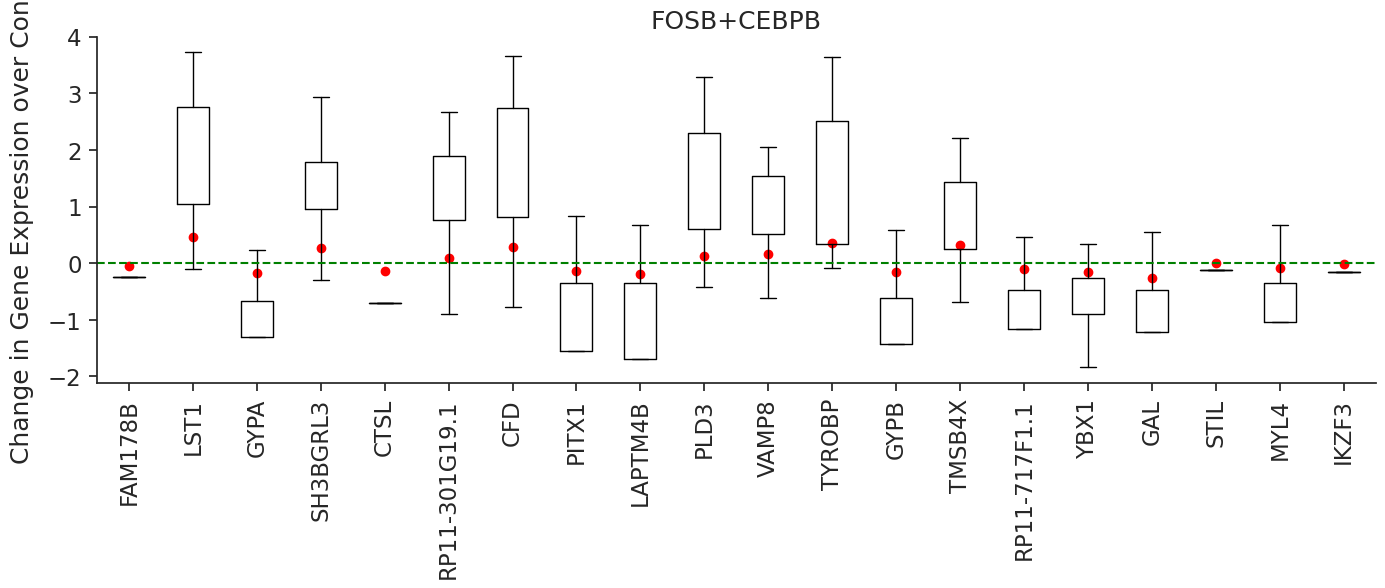

In [46]:
gears_model.plot_perturbation('FOSB+CEBPB')